# Imports

In [67]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import seaborn as sns

import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

# Hyperparameters and settings

In [68]:
EPOCHS = 100
LEARNING_RATES = [0.1, 0.01, 0.001]
BATCH_SIZE = 32

IMG_DIMENSIONS = (256, 256)

In [69]:
sns.set()

# Functions

In [70]:
labels = pd.read_csv("labels.csv")

In [71]:
labels.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [72]:
# Getting training data
training_data = dict()
class_names = dict()
training_data_path = "./traffic_Data/DATA"
for folder in os.listdir(training_data_path):
    subfolders_path = training_data_path + "/" + folder
    label, class_name = int(folder), labels[labels["ClassId"] == int(folder)].values[0][1] # It's 2 dimensional array 0 takes out data from matrix - 1 takes out name from array
    training_data[label], class_names[label] = [], class_name
    for image in os.listdir(subfolders_path):
        training_data[label].append(subfolders_path + "/" + image)

In [73]:
# Getting test data
test_data = {}
test_data_path = "./traffic_Data/TEST"
for image in os.listdir(test_data_path):
    image_class = int(image.split("_")[0])
    if image_class not in test_data.keys():
        test_data[image_class] = []
    test_data[image_class].append(test_data_path + "/" + image)

Text(0.5, 1.0, 'Distribution of classes in training part of the dataset.')

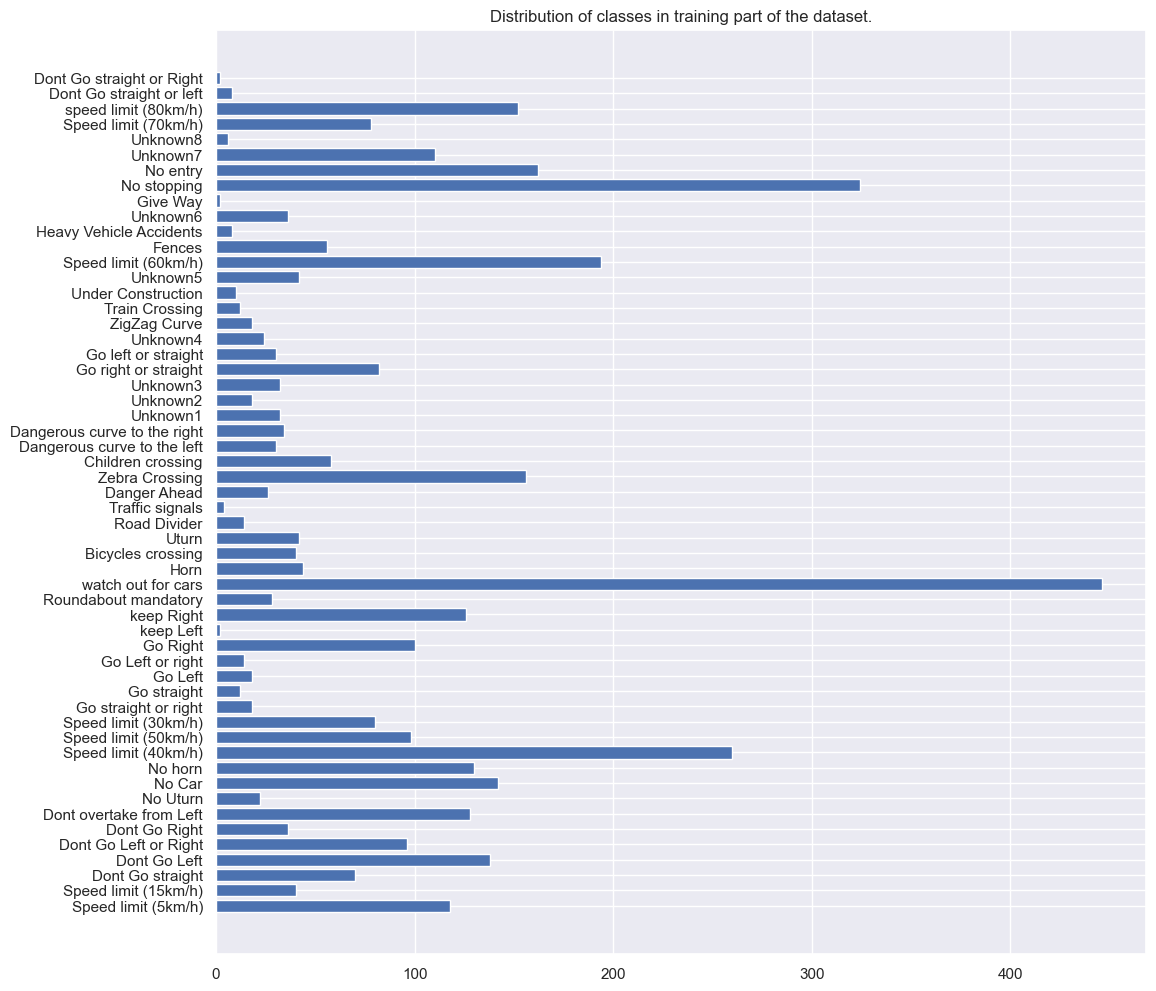

In [81]:
# Getting distribution of classes inside training part of the dataset
fig, ax = plt.subplots(figsize=(12, 12))

data = dict()

for label, files in training_data.items():
    name = class_names[int(label)]
    amount = len(files)
    data[name] = amount

ax.barh(list(data.keys()), list(data.values()))
plt.title("Distribution of classes in training part of the dataset.")

Text(0.5, 1.0, 'Distribution of classes in training part of the dataset.')

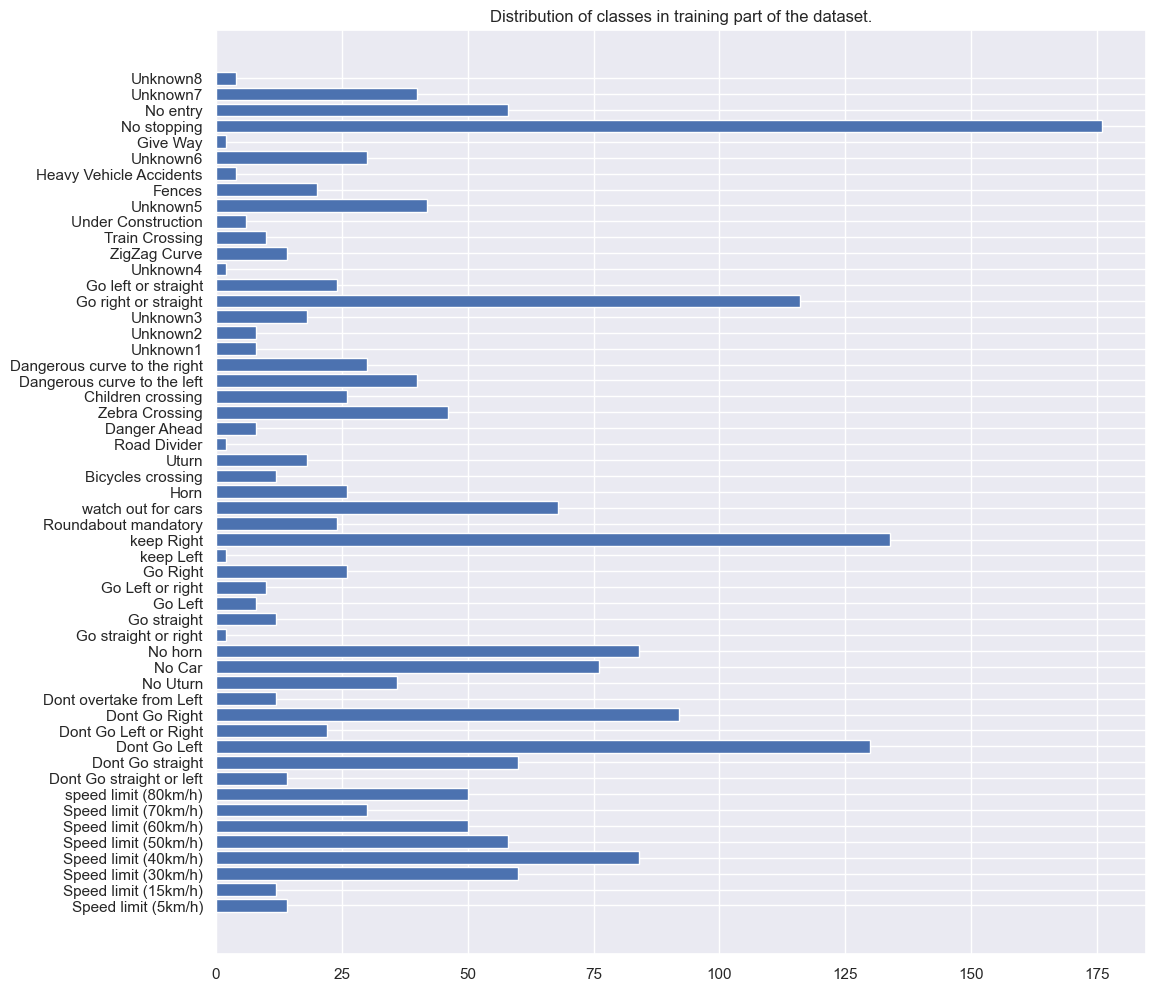

In [82]:
# Getting distribution of classes inside test part of the dataset
fig, ax = plt.subplots(figsize=(12, 12))

data = dict()

for label, files in test_data.items():
    name = class_names[int(label)]
    amount = len(files)
    data[name] = amount

ax.barh(list(data.keys()), list(data.values()))
plt.title("Distribution of classes in test part of the dataset.")